Dataset Loaded Successfully 
  Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0      1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1      2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2      3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3      4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4      5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0  

<Figure size 640x480 with 0 Axes>

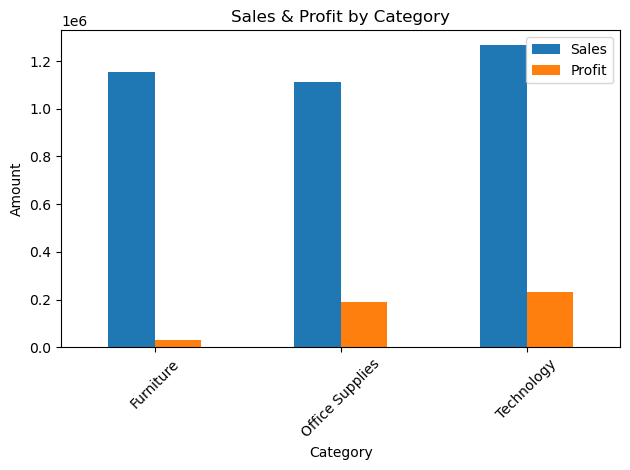

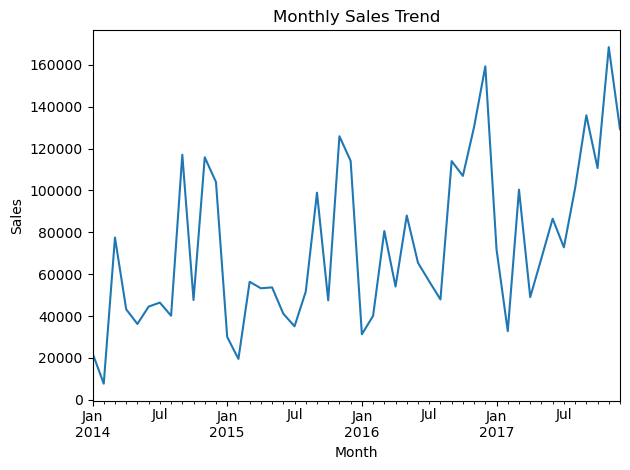

/tmp/ipykernel_431/54905760.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


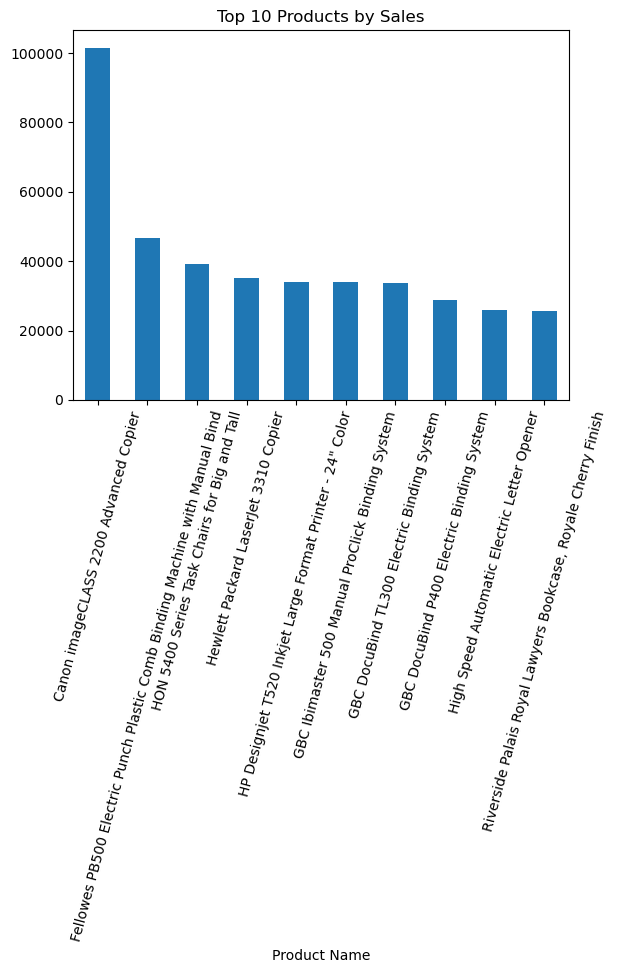


===== SALES FORECAST =====
Predicted Sales for Next Month: 501045.72

Project Completed Successfully 


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv(
    r"Sample - Superstore.csv",
    encoding='latin1'
)

df.dropna(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])

print("Dataset Loaded Successfully ")
print(df.head())

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

print("\n===== KPI SUMMARY =====")
print("Total Sales:", round(total_sales, 2))
print("Total Profit:", round(total_profit, 2))
print("Profit Margin (%):", round(profit_margin, 2))

category_data = df.groupby('Category')[['Sales','Profit']].sum()

plt.figure()
category_data.plot(kind='bar')
plt.title("Sales & Profit by Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


df['Month'] = df['Order Date'].dt.to_period("M")
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


top_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


df['Month_Number'] = df['Order Date'].dt.month

monthly = df.groupby('Month_Number')['Sales'].sum().reset_index()

X = monthly[['Month_Number']]
y = monthly['Sales']

model = LinearRegression()
model.fit(X, y)

future_month = np.array([[13]])
prediction = model.predict(future_month)

print("\n===== SALES FORECAST =====")
print("Predicted Sales for Next Month:", round(prediction[0], 2))

print("\nProject Completed Successfully ")
